<a href="https://colab.research.google.com/github/AlexMier/nlp-hackathon/blob/main/ModeloTranscripcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!pip install pandas librosa

In [3]:
from google.colab import files

canciones = files.upload()

Saving 41PAIMON.mp3 to 41PAIMON.mp3
Saving ALICEINBORDERLAND.mp3 to ALICEINBORDERLAND.mp3
Saving DOGSHIT.mp3 to DOGSHIT.mp3
Saving DOPPELGANGER.mp3 to DOPPELGANGER.mp3
Saving ENRICOCARUSO.mp3 to ENRICOCARUSO.mp3
Saving ESPESO.mp3 to ESPESO.mp3
Saving FLAVOURCHASER.mp3 to FLAVOURCHASER.mp3
Saving GLOCK9.mp3 to GLOCK9.mp3
Saving HOMENAJE.mp3 to HOMENAJE.mp3
Saving IFFREESTYLE.mp3 to IFFREESTYLE.mp3
Saving KINGCOBRA.mp3 to KINGCOBRA.mp3
Saving LATIMBA.mp3 to LATIMBA.mp3
Saving LUZV€RD€.mp3 to LUZV€RD€.mp3
Saving MASHALLAH.mp3 to MASHALLAH.mp3
Saving METROIT.mp3 to METROIT.mp3
Saving MIMOSA73U.mp3 to MIMOSA73U.mp3
Saving MISSFAVELA.mp3 to MISSFAVELA.mp3
Saving NOCOMPETION.mp3 to NOCOMPETION.mp3
Saving NOLOLZONE.mp3 to NOLOLZONE.mp3
Saving PACODELUCÏA.mp3 to PACODELUCÏA.mp3
Saving PONMEALTO.mp3 to PONMEALTO.mp3
Saving REDFLAG.mp3 to REDFLAG.mp3
Saving STREETXO.mp3 to STREETXO.mp3
Saving SUCHITOMISSION.mp3 to SUCHITOMISSION.mp3
Saving SZAFREESTYLE.mp3 to SZAFREESTYLE.mp3
Saving TALKINGSHIT.m

In [4]:
letras = files.upload()

Saving letras.xlsx to letras.xlsx


In [5]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [14]:
os.getcwd()

'/content'

In [16]:
os.listdir('/content')

['.config',
 'TALKINGSHIT.mp3',
 'PACODELUCÏA.mp3',
 'NOCOMPETION.mp3',
 'KINGCOBRA.mp3',
 'letras.xlsx',
 'HOMENAJE.mp3',
 'VENTANAVS1.mp3',
 'ZAZAFATA.mp3',
 'FLAVOURCHASER.mp3',
 'DOPPELGANGER.mp3',
 'MISSFAVELA.mp3',
 'SZAFREESTYLE.mp3',
 'DOGSHIT.mp3',
 'NOLOLZONE.mp3',
 'LUZV€RD€.mp3',
 'ESPESO.mp3',
 'METROIT.mp3',
 'IFFREESTYLE.mp3',
 'MASHALLAH.mp3',
 'STREETXO.mp3',
 'MIMOSA73U.mp3',
 'REDFLAG.mp3',
 'PONMEALTO.mp3',
 'ALICEINBORDERLAND.mp3',
 'LATIMBA.mp3',
 'ENRICOCARUSO.mp3',
 'GLOCK9.mp3',
 '41PAIMON.mp3',
 'SUCHITOMISSION.mp3',
 'sample_data']

In [6]:
letras_df = pd.read_excel('/content/letras.xlsx')
letras_df

,Artista,Cancion,Letra
0,GLOOSITO,PACODELUCÏA,"Ey, Baby Pantera, olé\nGideo, olé\nEy (yeah), ..."
1,GLOOSITO,TALKINGSHIT,"Ooh, SAV killed it\nTiro millas y si me pillan..."
2,GLOOSITO,LUZV€RD€,"Lo siento zorra, estoy adicto al chito\nLo sie..."
3,GLOOSITO,SUCHITOMISSION,Famosos en el barrio sin alfombras rojas\nYo s...
4,GLOOSITO,MIMOSA73U,"Yeah, Rich Farmers shit (Fah-fah-fah-fah)\nBab..."
5,GLOOSITO,HOMENAJE,"Ba-Ba-Baby P, you lifted it\nYeah\nCon mis dem..."
6,GLOOSITO,STREETXO,"Melonero, esto es bueno, ¿quieres uno o dos?\n..."
7,GLOOSITO,DOPPELGANGER,"Go, go, go, go\nTráeme el bulldog, quiero acar..."
8,GLOOSITO,NOLOLZONE,"Baby P, you lifted it\nGese on God\n(Yeah, CTD..."
9,GLOOSITO,PONMEALTO,"Yeah-ah-ah\nMarihua' fue mi doctor, ah (Doctor..."


In [7]:
letras_df = letras_df.sort_values(by=letras_df.columns[1])
letras_df

,Artista,Cancion,Letra
25,GLOOSITO,41PAIMON,D-D-DJ Dadda\nPort-au-Prince\nCTDS Cartel\nGAR...
26,GLOOSITO,ALICEINBORDERLAND,"Huh, yeah, huh-huh\nYeah, ah\nFeedin' my bitch..."
21,GLOOSITO,DOGSHIT,Con la capucha de pelo y mis nuevas Timbo\nCir...
7,GLOOSITO,DOPPELGANGER,"Go, go, go, go\nTráeme el bulldog, quiero acar..."
23,GLOOSITO,ENRICOCARUSO,"La empresa, negro, we on\nWe on\nOh, CTDS la e..."
17,GLOOSITO,ESPESO,"Prrru\nYeah, Gloo\nEy, yeah, Gloo\nFumando sie..."
27,GLOOSITO,FLAVOURCHASER,"Estas no son Cookies, no me times\nTú no quier..."
15,GLOOSITO,GLOCK9,"No, no\nBaby P, you lifted it (pow-pow, Gloo)\..."
5,GLOOSITO,HOMENAJE,"Ba-Ba-Baby P, you lifted it\nYeah\nCon mis dem..."
24,GLOOSITO,IFFREESTYLE,"Uh, yeah, uh\nYeah, eh\nSi no me lleva la cont..."


In [9]:
audio_file_path = '/content/41PAIMON.mp3'  # Reemplaza 'audio.wav' con el nombre de tu archivo de audio

# Cargar el archivo de audio
audio_data, sample_rate = librosa.load(audio_file_path)

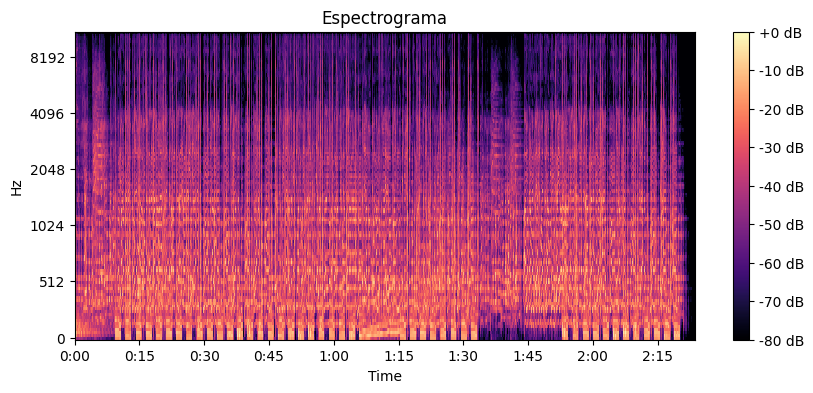

In [10]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Generar el espectrograma del audio
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Convertir el espectrograma a decibeles (escala logarítmica)
PAIMON = librosa.power_to_db(spectrogram, ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(PAIMON, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

In [11]:
letras_df['Spectrogram'] = None

for index, row in letras_df.iterrows():
    # Obtener el nombre del archivo de audio de la fila actual
    audio_filename = row['Cancion']
    audio_path = '/content/' + audio_filename + '.mp3'

    audio_data, sample_rate = librosa.load(audio_path)

    # Generar el espectrograma del audio
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

    # Convertir el espectrograma a decibeles (escala logarítmica)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Almacenar el espectrograma como una nueva columna en el DataFrame
    letras_df.at[index, 'Spectrogram'] = spectrogram_db

In [54]:
#FUNCIONES PARA TOKENIZAR Y NORMALIZAR

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenize_text(text):
    # Tokenizar el texto
    tokens = word_tokenize(text.lower())
    # Filtrar palabras que no son alfanuméricas y no son stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('spanish')]
    return tokens

def normalize_text(tokens):
    # Lematizar las palabras
    lemmatizer = WordNetLemmatizer()
    normalized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return normalized_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
texto_ejemplo = "Esto es una frase de ejemplo."
tokens_ejemplo = tokenize_text(texto_ejemplo)
print(tokens_ejemplo)

['frase', 'ejemplo']


In [55]:
letras_df['letra_tokenizada'] = letras_df['Letra'].apply(tokenize_text)
letras_df['letra_normalizada'] = letras_df['Letra'].apply(normalize_text)


In [56]:
from keras.preprocessing.text import Tokenizer

# Crear un objeto Tokenizer
tokenizer = Tokenizer()

# Ajustar el Tokenizer al texto tokenizado
tokenizer.fit_on_texts(letras_df['Letra'])

# Obtener la representación numérica de las letras tokenizadas
sequences = tokenizer.texts_to_sequences(letras_df['Letra'])

# Agregar la columna 'sequences' al DataFrame
letras_df['sequences'] = sequences

In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Obtener la longitud máxima de las secuencias
max_sequence_length = max(len(seq) for seq in letras_df['sequences'])

# Padding de las secuencias de letras
letras_df['letra_tokenizada_padded'] = pad_sequences(letras_df['sequences'], maxlen=max_sequence_length, padding='post').tolist()

In [103]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Reshape

# Definir la longitud de las secuencias (longitud máxima de la letra tokenizada)
max_sequence_length = letras_df['letra_tokenizada_padded'].apply(len).max()

# Definir el número de palabras únicas en el vocabulario
vocab_size = len(tokenizer.word_index) + 1  # +1 para incluir el índice 0

# Definir el modelo Sequential
model = Sequential()

# Añadir la capa de entrada (SimpleRNN)
model.add(SimpleRNN(units=64, input_shape=(max_sequence_length, 1), activation='relu'))

# Añadir la capa de salida (Dense) con activación 'softmax'
model.add(Dense(units=max_sequence_length * vocab_size, activation='softmax'))

# Añadir la capa Reshape para ajustar las dimensiones
model.add(Reshape((max_sequence_length, vocab_size)))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_2 (Dense)             (None, 1383750)           89943750  
                                                                 
 reshape (Reshape)           (None, 625, 2214)         0         
                                                                 
Total params: 89947974 (343.12 MB)
Trainable params: 89947974 (343.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Suponiendo que 'espectro_array' es una lista de espectrogramas representados como matrices NumPy
espectro_array = np.array(letras_df['Spectrogram'])

# Determina la longitud máxima de las filas y columnas de los espectrogramas
max_length_row = max(spec.shape[0] for spec in espectro_array)
max_length_col = max(spec.shape[1] for spec in espectro_array)

# Rellena o trunca las matrices para que tengan la misma longitud en filas y columnas
espectro_padded = [np.pad(spec, ((0, max_length_row - spec.shape[0]), (0, max_length_col - spec.shape[1])), mode='constant') for spec in espectro_array]

# Normaliza las filas y columnas de cada matriz por separado
X_normalized = []
for spec in espectro_padded:
    # Normaliza las filas (axis=0)
    scaler_row = MinMaxScaler(feature_range=(0, 1))
    spec_normalized_row = scaler_row.fit_transform(spec.T).T  # Transpone la matriz para normalizar las filas
    # Normaliza las columnas (axis=1)
    scaler_col = MinMaxScaler(feature_range=(0, 1))
    spec_normalized_col = scaler_col.fit_transform(spec_normalized_row)
    X_normalized.append(spec_normalized_col)

# Convierte la lista resultante en un arreglo NumPy
X_normalized = np.array(X_normalized)


In [25]:
import numpy as np

# Supongamos que tienes una lista de espectrogramas llamada 'espectrogramas'
# Cada espectrograma es una matriz de tamaño (ancho, alto)
# Aquí 'ancho' representa el número de puntos en el eje temporal y 'alto' el número de puntos en el eje de frecuencia

# Redimensionar todos los espectrogramas
espectrogramas_redimensionados = []
for espectrograma in X_normalized:
    espectrograma_redimensionado = np.resize(espectrograma, (625, 1))
    espectrogramas_redimensionados.append(espectrograma_redimensionado)

# Convertir la lista de espectrogramas redimensionados a un arreglo NumPy
X_redimensionados = np.array(espectrogramas_redimensionados)

In [60]:
X_redimensionados.shape

(28, 625, 1)

In [20]:

# Datos de salida (letras tokenizadas o normalizadas)
y = letras_df['letra_tokenizada_padded']
y = y.values

In [75]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_redimensionados, y, test_size=0.2, random_state=42)

In [83]:
import numpy as np

# Convertir listas en arreglos NumPy
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

In [79]:
import numpy as np

# Convertir listas en arreglos NumPy
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [91]:
import numpy as np

y_train_array = np.array([np.array(elem) for elem in y_train_array])
y_test_array = np.array([np.array(elem) for elem in y_test_array])

In [96]:
from keras.utils import to_categorical

# Convertir las etiquetas a codificación one-hot
y_train_one_hot = to_categorical(y_train_array, num_classes=vocab_size)
y_test_one_hot = to_categorical(y_test_array, num_classes=vocab_size)

In [98]:
y_train_one_hot.shape

(22, 625, 2214)

In [105]:
history = model.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_array, y_test_one_hot))

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 7.7025 - accuracy: 4.3636e-04 - val_loss: 7.6985 - val_accuracy: 0.3024
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 7.6982 - accuracy: 0.3000 - val_loss: 7.6938 - val_accuracy: 0.3853
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 7.6932 - accuracy: 0.3632 - val_loss: 7.6884 - val_accuracy: 0.4504
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 7.6874 - accuracy: 0.4086 - val_loss: 7.6822 - val_accuracy: 0.4931
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 7.6806 - accuracy: 0.4385 - val_loss: 7.6748 - val_accuracy: 0.5307
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 7.6726 - accuracy: 0.4601 - val_loss: 7.6661 - val_accuracy: 0.5469
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 7.6630 - accuracy: 0.4700 - val_loss: 7.6557 - val_accuracy: 0.5531
Epoch 8/10
1/1 [=====================

In [27]:
def int_to_one_hot(sequence, num_classes):
    result = np.zeros((len(sequence), num_classes))
    for i, value in enumerate(sequence):
        result[i, value] = 1
    return result

# Convertir los datos de salida a one-hot encoding
y_train_one_hot = np.array([int_to_one_hot(seq, vocab_size) for seq in y_train])
y_test_one_hot = np.array([int_to_one_hot(seq, vocab_size) for seq in y_test])

In [45]:
import numpy as np

# Ajustar las dimensiones de los datos de entrada
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [50]:
import numpy as np

# Ajustar las dimensiones de los datos de salida
y_train_one_hot_reshaped = y_train_one_hot.reshape(-1, y_train_one_hot.shape[1])
y_test_one_hot_reshaped = y_test_one_hot.reshape(-1, y_test_one_hot.shape[1])

In [53]:
print("Forma de X_train_reshaped:", X_train_reshaped.shape)
print("Forma de y_train_one_hot_reshaped:", y_train_one_hot_reshaped.shape)
print("Forma de X_test_reshaped:", X_test_reshaped.shape)
print("Forma de y_test_one_hot_reshaped:", y_test_one_hot_reshaped.shape)

Forma de X_train_reshaped: (22, 625, 1)
Forma de y_train_one_hot_reshaped: (48708, 625)
Forma de X_test_reshaped: (6, 625, 1)
Forma de y_test_one_hot_reshaped: (13284, 625)
